# Predicting Student Admissions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

## Preliminary Data Exploration


First things first, let's load the data:

In [2]:
df = pd.read_csv("data/student-admissions.csv")

We can have a look at the data and its metrics:

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [5]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


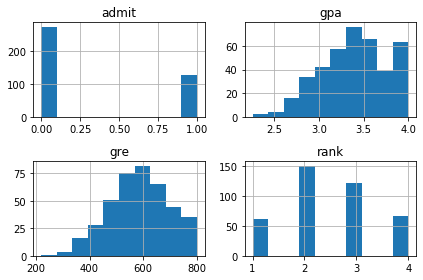

In [6]:
df.hist()
plt.tight_layout() # Avoid axis labels clashing
plt.show()

We see that the dataset contains GRE scores, GPA and rank for 400 different students and their admission (`1`) or rejection (`0`) label.

## Train and Test Sets

Before exploring the data further, let's set aside part of the data to test our model. We can use `scikit-learn` to split the data into a training and validatin set:

In [7]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Create a copy instead of a view to avoid SettingWithCopyWarning
train_set, test_set = train_set.copy(), test_set.copy()

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 3 to 102
Data columns (total 4 columns):
admit    320 non-null int64
gre      320 non-null int64
gpa      320 non-null float64
rank     320 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.5 KB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 209 to 289
Data columns (total 4 columns):
admit    80 non-null int64
gre      80 non-null int64
gpa      80 non-null float64
rank     80 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 KB


## Data Exploration

We can now have a deeper look at the training set.

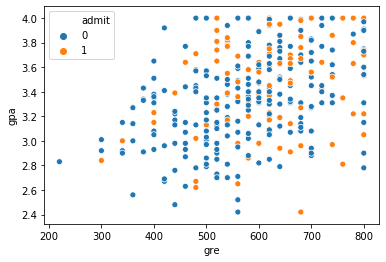

In [10]:
sns.scatterplot(x="gre", y="gpa", hue="admit", data=train_set)
plt.show()

The data does not look very well separated. We can therefore try to incorporate the `rank` variable as well:

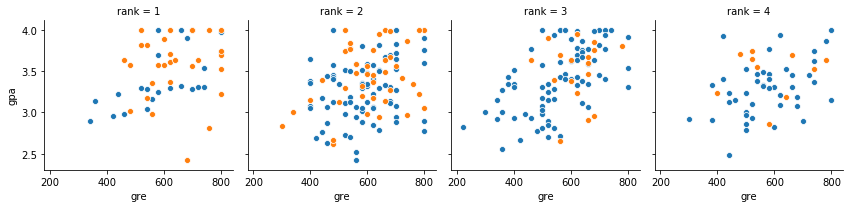

In [11]:
g = sns.FacetGrid(train_set, col="rank", hue="admit",)
g.map(sns.scatterplot, "gre", "gpa")
plt.show()

We see that the number of admission tend to decrease when the rank increases.

## One-Hot Encoding

In [12]:
ranks = train_set[["rank"]] # Use double brackets [[]] to get 2D array
encoder = OneHotEncoder(categories="auto")

ranks_1hot = encoder.fit_transform(ranks)

# Transform sparse matrix to dense matrix
ranks_1hot = ranks_1hot.toarray()

print(ranks_1hot)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [13]:
for i in range(4):
    train_set.loc[:, f"rank_{i}"] = ranks_1hot[:,i]
    
train_set =  train_set.drop('rank', axis=1)

In [14]:
train_set.head()

,admit,gre,gpa,rank_0,rank_1,rank_2,rank_3
3,1,640,3.19,0.0,0.0,0.0,1.0
18,0,800,3.75,0.0,1.0,0.0,0.0
202,1,700,4.00,1.0,0.0,0.0,0.0
250,0,660,3.31,0.0,0.0,0.0,1.0
274,0,520,3.12,0.0,1.0,0.0,0.0


## Feature Scaling

Let's have a second look at the training set:

In [15]:
train_set.describe()

,admit,gre,gpa,rank_0,rank_1,rank_2,rank_3
count,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.312500,587.56250,3.381906,0.162500,0.375000,0.293750,0.168750
std,0.464238,116.57197,0.377365,0.369487,0.484881,0.456192,0.375118
min,0.000000,220.00000,2.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.00000,3.117500,0.000000,0.000000,0.000000,0.000000
50%,0.000000,600.00000,3.380000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,665.00000,3.670000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.00000,4.000000,1.000000,1.000000,1.000000,1.000000


We see that the GRE  score is between 220 and 800, while  the GPA is between  2.26 and 4.0. This can hinder the performance of our model and therefore we need to re-scale the data

In [16]:
scaler = MinMaxScaler()

scaled = scaler.fit_transform(train_set[["gre", "gpa"]])

train_set.loc[:, ["gre", "gpa"]] = scaled

In [17]:
train_set.head()

,admit,gre,gpa,rank_0,rank_1,rank_2,rank_3
3,1,0.724138,0.487342,0.0,0.0,0.0,1.0
18,0,1.000000,0.841772,0.0,1.0,0.0,0.0
202,1,0.827586,1.000000,1.0,0.0,0.0,0.0
250,0,0.758621,0.563291,0.0,0.0,0.0,1.0
274,0,0.517241,0.443038,0.0,1.0,0.0,0.0


## Neural Network

### Building Blocks

First let's implement the activation function. For this simple neural network we use the Sigmoid activation function
$$
    \sigma(x) = \frac{1}{1 + \exp(-x)}
$$

In [18]:
def sigmoid(x):
    """
    Sigmoid function.
    """
    return 1 / (1 + np.exp(-x))

The gradient of the activation function, needed for future calculations, is the following:
$$
    \frac{d}{dx}\sigma(x) = \frac{1}{(1 + \exp(-x))^2}\exp(-x) = \frac{1}{1 + \exp(-x)}\frac{\exp(-x)}{1 + \exp(-x)} =  \sigma(x)(1 - \sigma(x))
$$

We can now define a loss function. Since we are interested in a binary classification problem we can use the cross-entropy loss (defined using Einstein notation):

$$
    \mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = 
        -y_i \ln\left( \hat{y}_i \right) - (1 - y_i) \ln\left(1 - \hat{y}_i\right)
$$

In order to perform backpropagation we need to compute the gradient of the loss function with respect to the weights. For a single-layer neural network our prediction is given by

$$
    \hat{\mathbf{y}} = \sigma(\mathbf{W} \cdot \mathbf{x})
$$

and therefore we have

$$
    \frac{\partial}{\partial \mathbf{W}}\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) =
        \frac{\mathbf{y} - \hat{\mathbf{y}}}{(1 - \hat{\mathbf{y}})\mathbf{y}}\frac{\partial}{\partial \mathbf{W}} \hat{\mathbf{y}}
$$

Since
$$
    \frac{\partial}{\partial \mathbf{W}} \hat{\mathbf{y}} = \sigma(\mathbf{W} \cdot \mathbf{x}) (1 - \sigma(\mathbf{W} \cdot \mathbf{x})) \mathbf{x} = (1 -  \hat{\mathbf{y}})\hat{\mathbf{y}} \mathbf{x}
$$

we finally ger

$$
    \frac{\partial}{\partial \mathbf{W}}\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) =
        (\mathbf{y} - \hat{\mathbf{y}}) \mathbf{x}
$$

In [19]:
def grad(x, y, yp):
    return (y - yp) * x

Computing the cross-entropy loss can be numerically instable because of the `np.log` function, therefore we can keep track of the model performance using the mean-square error:

In [20]:
def mean_square_error(y, yp):
    return np.mean((y - yp)**2)

### Features and Targets

In [21]:
features_train = train_set.drop("admit", axis=1).to_numpy()
targets_train = train_set["admit"].to_numpy()

### Model and Training

In [22]:
epochs = 1000
lr = 0.5 # Learning rate

In [23]:
def show(epoch, features, targets, weights):
    predictions = sigmoid(np.dot(features, weights))
    mse = mean_square_error(targets, predictions)
    
    print("Epoch:", epoch)
    print("MSE: ", mse)
    print("=========")

def train(features, targets, epochs, learnrate):
    
    n_samples, n_features = features.shape
    
    # Random weight initialization
    weights = np.random.normal(scale=1 / np.sqrt(n_features), size=n_features)

    for epoch in range(epochs):
        
        dw = np.zeros(weights.shape)
        
        for x, y in zip(features, targets):

            yp = sigmoid(np.dot(x, weights))

            dw += grad(x, y, yp)

        weights += lr * dw / n_samples

        if epoch % (epochs / 10) == 0:
            show(epoch, features, targets, weights)
    
    return weights

weights = train(features_train, targets_train, epochs, lr)

Epoch: 0
MSE:  0.24829574330845797
Epoch: 100
MSE:  0.20290200165113345
Epoch: 200
MSE:  0.1989487603738417
Epoch: 300
MSE:  0.19644174026862965
Epoch: 400
MSE:  0.19466678796231196
Epoch: 500
MSE:  0.19338572726966233
Epoch: 600
MSE:  0.19244862144261038
Epoch: 700
MSE:  0.19175555153980559
Epoch: 800
MSE:  0.1912384989511851
Epoch: 900
MSE:  0.1908501809958283


### Test

We need to apply the same transofrmations we applied to the training set to the test set:

In [24]:
ranks = test_set[["rank"]] # Use double brackets [[]] to get 2D array

ranks_1hot = encoder.transform(ranks)
ranks_1hot = ranks_1hot.toarray()

for i in range(4):
    test_set.loc[:, f"rank_{i}"] = ranks_1hot[:,i]

test_set =  test_set.drop('rank', axis=1)

In [25]:
scaled = scaler.transform(test_set[["gre", "gpa"]])
test_set.loc[:, ["gre", "gpa"]] = scaled

In [26]:
test_set.head()

,admit,gre,gpa,rank_0,rank_1,rank_2,rank_3
209,0,0.620690,0.683544,0.0,1.0,0.0,0.0
280,0,0.758621,0.962025,0.0,1.0,0.0,0.0
33,1,1.000000,1.000000,0.0,0.0,1.0,0.0
210,0,0.896552,0.582278,0.0,0.0,0.0,1.0
93,0,0.620690,0.322785,0.0,1.0,0.0,0.0


In [27]:
features_test = test_set.drop("admit", axis=1).to_numpy()
targets_test = test_set["admit"].to_numpy()

In [28]:
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.67500
